In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Data preparation

In [3]:
df=pd.read_excel('cars.xlsx')
df.head()

symboling  normalized.losses        make fuel.type aspiration num.of.doors  \
0          1              129.0       mazda       gas        std          two   
1          1              125.0  mitsubishi       gas        std         four   
2          3              150.0       mazda       gas        std          two   
3          3              194.0      nissan       gas        std          NaN   
4          0               85.0       honda       gas        std         four   

  body.style drive.wheels engine.location  wheel.base  ...  engine.size  \
0  hatchback          fwd           front        98.8  ...          122   
1      sedan          fwd           front        96.3  ...          122   
2  hatchback          rwd           front        95.3  ...           70   
3  hatchback          rwd           front        91.3  ...          181   
4      sedan          fwd           front        96.5  ...          110   

   fuel.system  bore  stroke compression.ratio horsepower  peak.rpm city.mpg  \
0         2bbl  3.39    3.39               8.6       84.0    4800.0       26   
1         2bbl  3.35    3.46               8.5       88.0    5000.0       25   
2         4bbl   NaN     NaN               9.4      101.0    6000.0       17   
3         mpfi  3.43    3.27               9.0      160.0    5200.0       19   
4         mpfi  3.15    3.58               9.0      101.0    5800.0       24   

   highway.mpg  Car_Price  
0           32    10595.0  
1           32     8189.0  
2           23    13645.0  
3           25    17199.0  
4           28    12945.0  

[5 rows x 26 columns]

In [4]:
df.tail()

symboling  normalized.losses    make fuel.type aspiration num.of.doors  \
157          0                NaN  peugot       gas        std         four   
158          3              145.0   dodge       gas      turbo          two   
159          3              194.0  nissan       gas        std          NaN   
160          0               85.0   honda       gas        std         four   
161          2               83.0  subaru       gas        std          two   

    body.style drive.wheels engine.location  wheel.base  ...  engine.size  \
157      wagon          rwd           front       114.2  ...          120   
158  hatchback          fwd           front        95.9  ...          156   
159  hatchback          rwd           front        91.3  ...          181   
160      sedan          fwd           front        96.5  ...          110   
161  hatchback          4wd           front        93.3  ...          108   

     fuel.system  bore  stroke compression.ratio horsepower  peak.rpm  \
157         mpfi  3.46    2.19               8.4       95.0    5000.0   
158          mfi  3.60    3.90               7.0      145.0    5000.0   
159         mpfi  3.43    3.27               9.0      160.0    5200.0   
160         mpfi  3.15    3.58               9.0      101.0    5800.0   
161         2bbl  3.62    2.64               8.7       73.0    4400.0   

    city.mpg  highway.mpg  Car_Price  
157       19           24    16695.0  
158       19           24    12964.0  
159       19           25    17199.0  
160       24           28    12945.0  
161       26           31     7603.0  

[5 rows x 26 columns]

In [5]:
df.shape

(162, 26)

# EDA(Exploratory data analysis)

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'wheel.base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression.ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak.rpm'}>,
        <Axes: title={'center': 'city.mpg'}>,
        <Axes: title={'center': 'highway.mpg'}>,
        <Axes: title={'center': 'Car_Price'}>]], dtype=object)

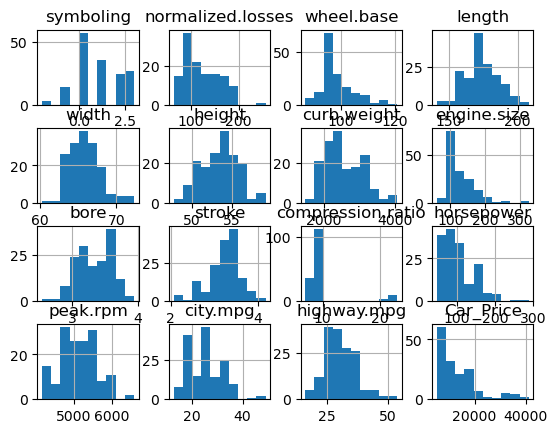

In [6]:
df.hist()

In [7]:
df.describe()

symboling  normalized.losses  wheel.base      length       width  \
count  162.000000         132.000000  162.000000  162.000000  162.000000   
mean     0.907407         123.060606   98.354321  173.595062   65.843210   
std      1.298855          36.144696    6.049384   12.339100    2.022325   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.425000   64.125000   
50%      1.000000         116.500000   96.500000  172.400000   65.450000   
75%      2.000000         150.000000  101.200000  181.650000   66.575000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb.weight  engine.size        bore      stroke  \
count  162.000000   162.000000   162.000000  159.000000  159.000000   
mean    53.537654  2561.932099   128.160494    3.341698    3.239434   
std      2.346770   524.474870    41.684844    0.274566    0.356446   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2151.000000    98.000000    3.150000    3.075000   
50%     53.700000  2419.500000   120.000000    3.330000    3.270000   
75%     55.500000  2975.750000   146.000000    3.605000    3.460000   
max     59.100000  4066.000000   326.000000    3.940000    4.170000   

       compression.ratio  horsepower     peak.rpm    city.mpg  highway.mpg  \
count         162.000000  158.000000   158.000000  162.000000   162.000000   
mean           10.008704  106.000000  5116.455696   25.123457    30.679012   
std             3.735804   41.489773   501.952971    6.604878     6.879309   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.700000   72.250000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5100.000000   24.000000    30.000000   
75%             9.400000  121.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

          Car_Price  
count    159.000000  
mean   13182.094340  
std     7746.121309  
min     5118.000000  
25%     7603.000000  
50%    10795.000000  
75%    16594.000000  
max    41315.000000

In [8]:
df.isnull().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
body.style            0
drive.wheels          0
engine.location       2
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      2
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [9]:
data=df.fillna(method="bfill")
data.isnull().sum()

symboling            0
normalized.losses    0
make                 0
fuel.type            0
aspiration           0
num.of.doors         0
body.style           0
drive.wheels         0
engine.location      0
wheel.base           0
length               0
width                0
height               0
curb.weight          0
engine.type          0
num.of.cylinders     0
engine.size          0
fuel.system          0
bore                 0
stroke               0
compression.ratio    0
horsepower           0
peak.rpm             0
city.mpg             0
highway.mpg          0
Car_Price            0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized.losses  162 non-null    float64
 2   make               162 non-null    object 
 3   fuel.type          162 non-null    object 
 4   aspiration         162 non-null    object 
 5   num.of.doors       162 non-null    object 
 6   body.style         162 non-null    object 
 7   drive.wheels       162 non-null    object 
 8   engine.location    162 non-null    object 
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    object 
 15  num.of.cylinders   162 non-null    object 
 16  engine.size        162 non

In [11]:
#convert string values in columns 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['make']=le.fit_transform(data['make'])
data.head()

symboling  normalized.losses  make fuel.type aspiration num.of.doors  \
0          1              129.0     8       gas        std          two   
1          1              125.0    10       gas        std         four   
2          3              150.0     8       gas        std          two   
3          3              194.0    11       gas        std         four   
4          0               85.0     5       gas        std         four   

  body.style drive.wheels engine.location  wheel.base  ...  engine.size  \
0  hatchback          fwd           front        98.8  ...          122   
1      sedan          fwd           front        96.3  ...          122   
2  hatchback          rwd           front        95.3  ...           70   
3  hatchback          rwd           front        91.3  ...          181   
4      sedan          fwd           front        96.5  ...          110   

   fuel.system  bore  stroke compression.ratio horsepower  peak.rpm city.mpg  \
0         2bbl  3.39    3.39               8.6       84.0    4800.0       26   
1         2bbl  3.35    3.46               8.5       88.0    5000.0       25   
2         4bbl  3.43    3.27               9.4      101.0    6000.0       17   
3         mpfi  3.43    3.27               9.0      160.0    5200.0       19   
4         mpfi  3.15    3.58               9.0      101.0    5800.0       24   

   highway.mpg  Car_Price  
0           32    10595.0  
1           32     8189.0  
2           23    13645.0  
3           25    17199.0  
4           28    12945.0  

[5 rows x 26 columns]

In [12]:
data['fuel.type']=le.fit_transform(data['fuel.type'])
data['aspiration']=le.fit_transform(data['aspiration'])
data['num.of.doors']=le.fit_transform(data['num.of.doors'])
data['body.style']=le.fit_transform(data['body.style'])
data['drive.wheels']=le.fit_transform(data['drive.wheels'])
data['engine.location']=le.fit_transform(data['engine.location'])
data['engine.type']=le.fit_transform(data['engine.type'])
data['num.of.cylinders']=le.fit_transform(data['num.of.cylinders'])
data['fuel.system']=le.fit_transform(data['fuel.system'])
data.head()

symboling  normalized.losses  make  fuel.type  aspiration  num.of.doors  \
0          1              129.0     8          1           0             1   
1          1              125.0    10          1           0             0   
2          3              150.0     8          1           0             1   
3          3              194.0    11          1           0             0   
4          0               85.0     5          1           0             0   

   body.style  drive.wheels  engine.location  wheel.base  ...  engine.size  \
0           2             1                0        98.8  ...          122   
1           3             1                0        96.3  ...          122   
2           2             2                0        95.3  ...           70   
3           2             2                0        91.3  ...          181   
4           3             1                0        96.5  ...          110   

   fuel.system  bore  stroke  compression.ratio  horsepower  peak.rpm  \
0            1  3.39    3.39                8.6        84.0    4800.0   
1            1  3.35    3.46                8.5        88.0    5000.0   
2            2  3.43    3.27                9.4       101.0    6000.0   
3            5  3.43    3.27                9.0       160.0    5200.0   
4            5  3.15    3.58                9.0       101.0    5800.0   

   city.mpg  highway.mpg  Car_Price  
0        26           32    10595.0  
1        25           32     8189.0  
2        17           23    13645.0  
3        19           25    17199.0  
4        24           28    12945.0  

[5 rows x 26 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized.losses  162 non-null    float64
 2   make               162 non-null    int32  
 3   fuel.type          162 non-null    int32  
 4   aspiration         162 non-null    int32  
 5   num.of.doors       162 non-null    int32  
 6   body.style         162 non-null    int32  
 7   drive.wheels       162 non-null    int32  
 8   engine.location    162 non-null    int32  
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    int32  
 15  num.of.cylinders   162 non-null    int32  
 16  engine.size        162 non

In [14]:
data.corr()

symboling  normalized.losses      make  fuel.type  \
symboling           1.000000           0.475287 -0.077937   0.181603   
normalized.losses   0.475287           1.000000 -0.183867   0.020349   
make               -0.077937          -0.183867  1.000000  -0.050428   
fuel.type           0.181603           0.020349 -0.050428   1.000000   
aspiration         -0.022238           0.088036  0.021969  -0.355113   
num.of.doors        0.582157           0.289628 -0.063124   0.101934   
body.style         -0.611864          -0.205213  0.042936  -0.162951   
drive.wheels       -0.048645           0.343285 -0.009837  -0.159604   
engine.location     0.180686          -0.006953  0.043834   0.034387   
wheel.base         -0.539268          -0.033953  0.098615  -0.353862   
length             -0.362855           0.072603  0.128294  -0.247297   
width              -0.198751           0.181684  0.030674  -0.270187   
height             -0.531914          -0.361088  0.251458  -0.312442   
curb.weight        -0.181271           0.164181  0.030358  -0.231470   
engine.type         0.115616          -0.108087 -0.067544   0.083191   
num.of.cylinders    0.188221           0.126702 -0.116187   0.129427   
engine.size        -0.049741           0.140499 -0.060970  -0.090269   
fuel.system         0.044981           0.281753  0.151270   0.041322   
bore               -0.056732           0.058407  0.275213  -0.067847   
stroke              0.021962           0.112659 -0.266902  -0.225377   
compression.ratio  -0.171719          -0.044625  0.068085  -0.982026   
horsepower          0.125595           0.262289 -0.062550   0.149399   
peak.rpm            0.216238           0.165372 -0.183841   0.420301   
city.mpg           -0.060925          -0.227256 -0.003460  -0.221112   
highway.mpg         0.011946          -0.187033 -0.008609  -0.152140   
Car_Price          -0.060502           0.124639 -0.134744  -0.138562   

                   aspiration  num.of.doors  body.style  drive.wheels  \
symboling           -0.022238      0.582157   -0.611864     -0.048645   
normalized.losses    0.088036      0.289628   -0.205213      0.343285   
make                 0.021969     -0.063124    0.042936     -0.009837   
fuel.type           -0.355113      0.101934   -0.162951     -0.159604   
aspiration           1.000000      0.025227    0.022632      0.097618   
num.of.doors         0.025227      1.000000   -0.599790     -0.037282   
body.style           0.022632     -0.599790    1.000000     -0.074358   
drive.wheels         0.097618     -0.037282   -0.074358      1.000000   
engine.location     -0.047760      0.123449   -0.273961      0.129223   
wheel.base           0.286006     -0.398820    0.421829      0.449206   
length               0.280490     -0.351727    0.348661      0.515423   
width                0.330710     -0.189869    0.107713      0.502517   
height               0.080039     -0.427146    0.524988     -0.045387   
curb.weight          0.358038     -0.185318    0.108496      0.591250   
engine.type         -0.128568      0.040240   -0.095954     -0.147343   
num.of.cylinders    -0.145318      0.103152   -0.015733      0.246328   
engine.size          0.156656     -0.046190   -0.073211      0.523112   
fuel.system          0.263800      0.007198   -0.070778      0.449322   
bore                 0.253873     -0.073966   -0.018460      0.409865   
stroke               0.242868      0.026188   -0.061979      0.100681   
compression.ratio    0.233911     -0.093359    0.156914      0.156070   
horsepower           0.255399      0.096829   -0.172709      0.486709   
peak.rpm            -0.152599      0.197673   -0.110219     -0.008219   
city.mpg            -0.254541      0.003745    0.074752     -0.469826   
highway.mpg         -0.298924      0.035153    0.029924     -0.479440   
Car_Price            0.209392     -0.051528   -0.087122      0.607846   

                   engine.location  wheel.base  ...  engine.size  fuel.system  \
symboling            

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'fuel.type'}>,
        <Axes: title={'center': 'aspiration'}>],
       [<Axes: title={'center': 'num.of.doors'}>,
        <Axes: title={'center': 'body.style'}>,
        <Axes: title={'center': 'drive.wheels'}>,
        <Axes: title={'center': 'engine.location'}>,
        <Axes: title={'center': 'wheel.base'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.type'}>],
       [<Axes: title={'center': 'num.of.cylinders'}>,
        <Axes: title={'center': 'engine.size'}>,
        <Axes: title={'center': 'fuel.system'}>,
        <Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'compress

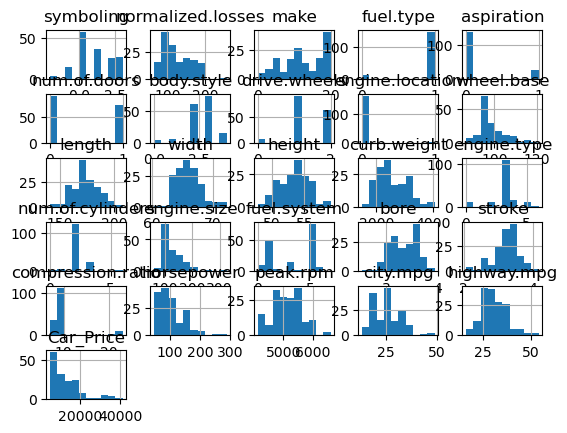

In [15]:
data.hist()

In [16]:
data.describe()

symboling  normalized.losses        make   fuel.type  aspiration  \
count  162.000000         162.000000  162.000000  162.000000  162.000000   
mean     0.907407         124.234568   11.790123    0.913580    0.154321   
std      1.298855          36.045097    5.654034    0.281854    0.362376   
min     -2.000000          65.000000    0.000000    0.000000    0.000000   
25%      0.000000          98.000000    8.000000    1.000000    0.000000   
50%      1.000000         118.000000   11.000000    1.000000    0.000000   
75%      2.000000         150.000000   17.750000    1.000000    0.000000   
max      3.000000         256.000000   20.000000    1.000000    1.000000   

       num.of.doors  body.style  drive.wheels  engine.location  wheel.base  \
count    162.000000  162.000000    162.000000       162.000000  162.000000   
mean       0.450617    2.555556      1.351852         0.012346   98.354321   
std        0.499098    0.841472      0.562517         0.110766    6.049384   
min        0.000000    0.000000      0.000000         0.000000   86.600000   
25%        0.000000    2.000000      1.000000         0.000000   94.500000   
50%        0.000000    3.000000      1.000000         0.000000   96.500000   
75%        1.000000    3.000000      2.000000         0.000000  101.200000   
max        1.000000    4.000000      2.000000         1.000000  120.900000   

       ...  engine.size  fuel.system        bore      stroke  \
count  ...   162.000000   162.000000  162.000000  162.000000   
mean   ...   128.160494     3.271605    3.343580    3.243148   
std    ...    41.684844     2.027833    0.272792    0.356490   
min    ...    61.000000     0.000000    2.540000    2.070000   
25%    ...    98.000000     1.000000    3.150000    3.080000   
50%    ...   120.000000     5.000000    3.340000    3.270000   
75%    ...   146.000000     5.000000    3.600000    3.460000   
max    ...   326.000000     7.000000    3.940000    4.170000   

       compression.ratio  horsepower     peak.rpm    city.mpg  highway.mpg  \
count         162.000000  162.000000   162.000000  162.000000   162.000000   
mean           10.008704  106.179012  5124.074074   25.123457    30.679012   
std             3.735804   41.375707   500.037956    6.604878     6.879309   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.700000   72.250000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5150.000000   24.000000    30.000000   
75%             9.400000  122.500000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

          Car_Price  
count    162.000000  
mean   13223.716049  
std     7690.678949  
min     5118.000000  
25%     7604.500000  
50%    10921.500000  
75%    16612.000000  
max    41315.000000  

[8 rows x 26 columns]

In [17]:
data.shape

(162, 26)

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'fuel.type'}>,
        <Axes: title={'center': 'aspiration'}>],
       [<Axes: title={'center': 'num.of.doors'}>,
        <Axes: title={'center': 'body.style'}>,
        <Axes: title={'center': 'drive.wheels'}>,
        <Axes: title={'center': 'engine.location'}>,
        <Axes: title={'center': 'wheel.base'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.type'}>],
       [<Axes: title={'center': 'num.of.cylinders'}>,
        <Axes: title={'center': 'engine.size'}>,
        <Axes: title={'center': 'fuel.system'}>,
        <Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'compress

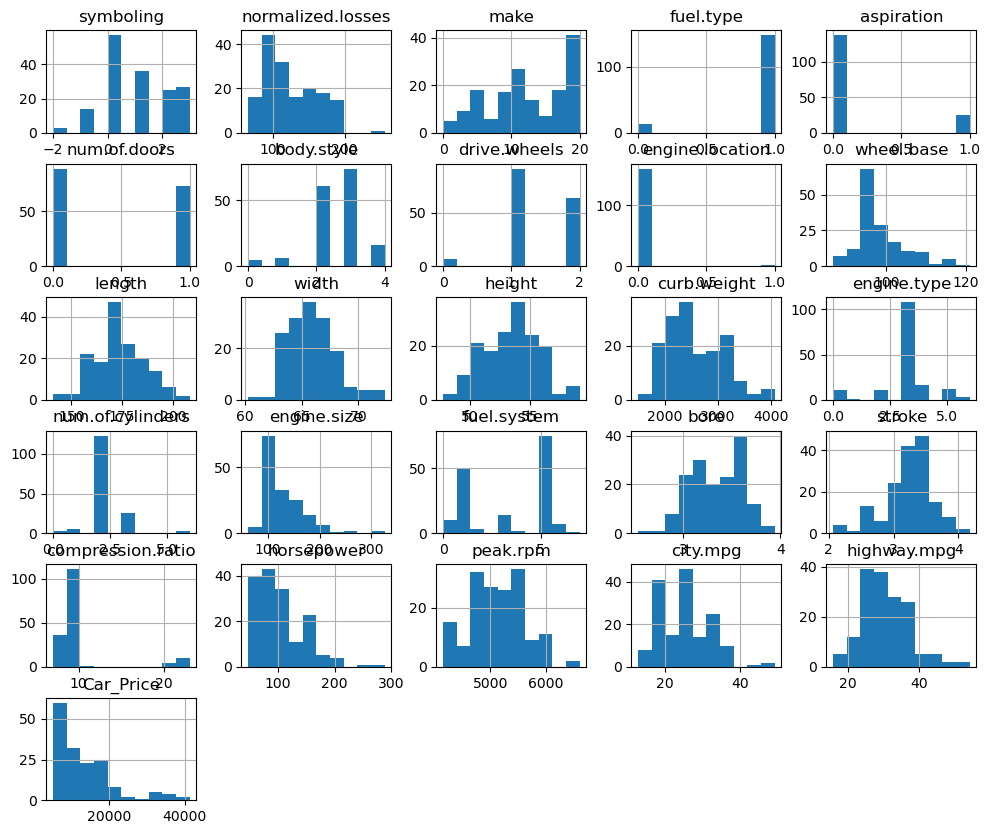

In [18]:
data.hist(figsize=(12,10))

<Axes: >

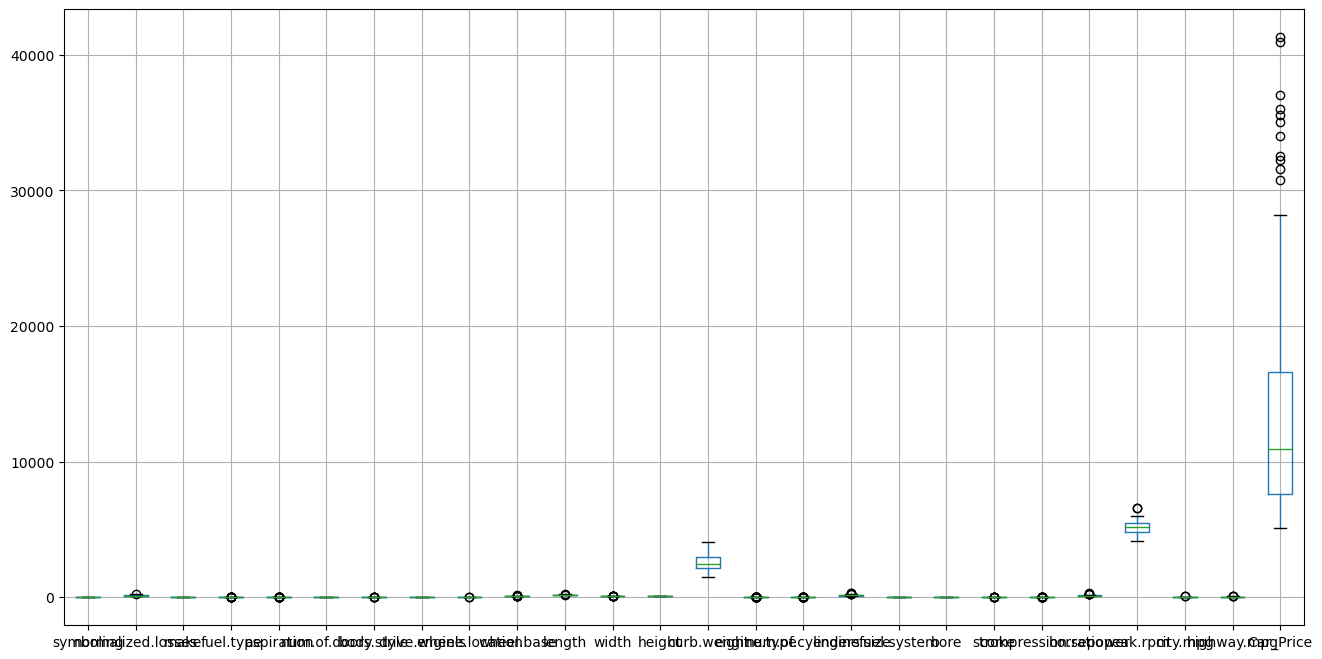

In [19]:
data.boxplot(figsize=(16,8))

<Axes: >

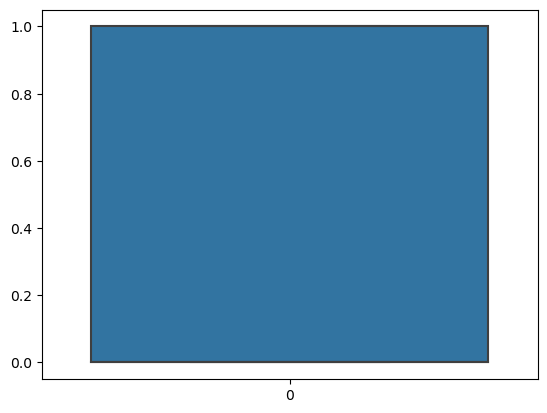

In [20]:
sns.boxplot(data['num.of.doors'])

<Axes: >

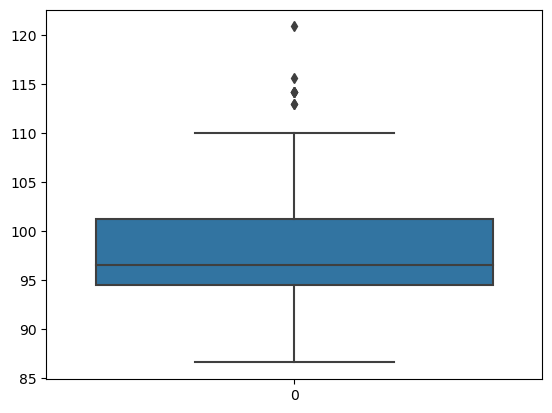

In [21]:
sns.boxplot(data['wheel.base'])

<Axes: >

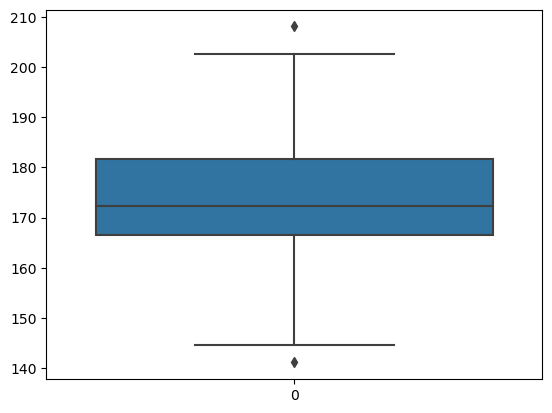

In [22]:
sns.boxplot(data['length'])

<Axes: >

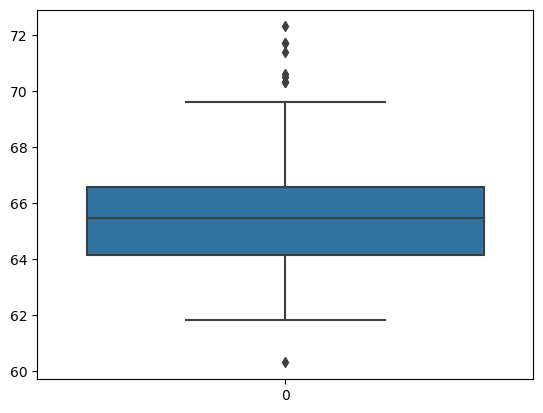

In [23]:
sns.boxplot(data['width'])

<Axes: >

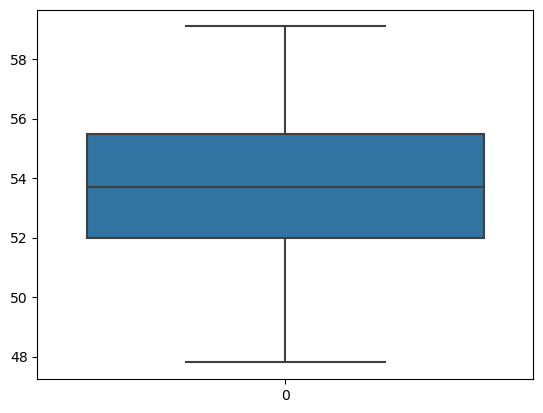

In [24]:
sns.boxplot(data['height'])

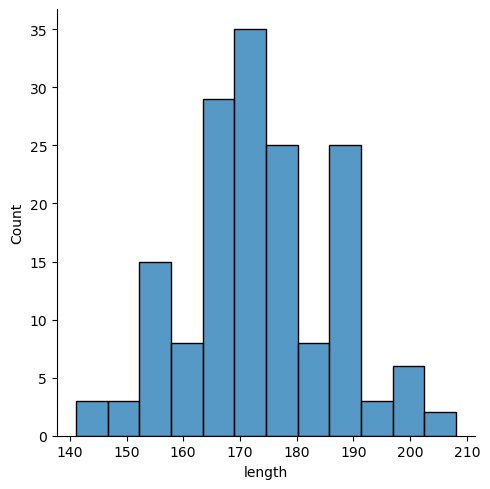

In [25]:
sns.displot(data['length'])

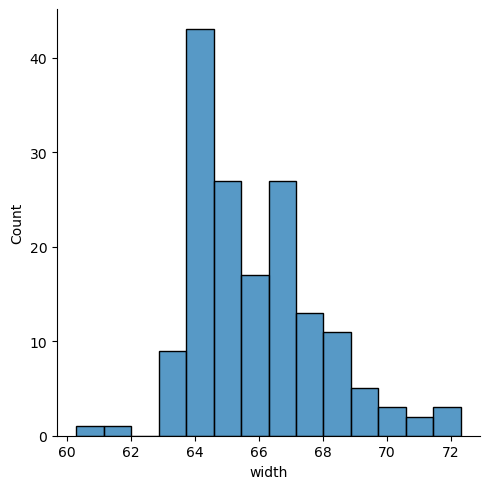

In [26]:
sns.displot(data['width'])

<Axes: ylabel='count'>

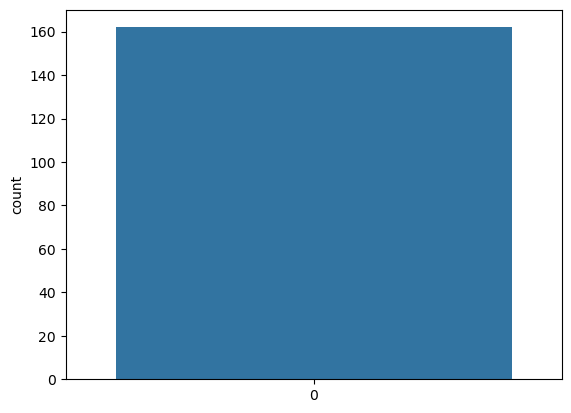

In [27]:
sns.countplot(data['Car_Price'])

<Axes: >

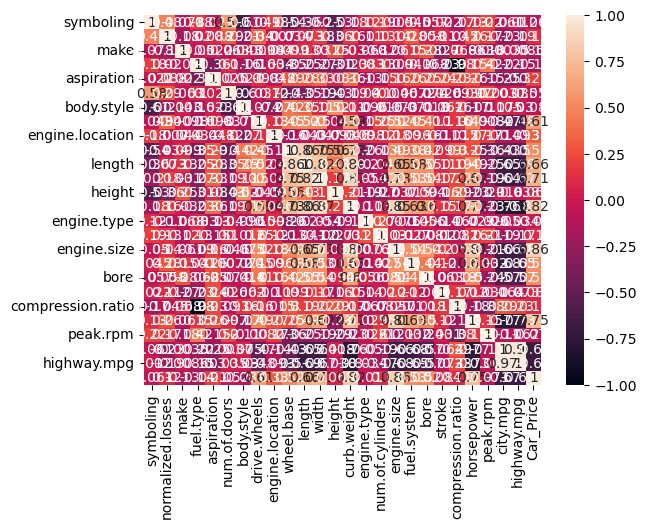

In [28]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

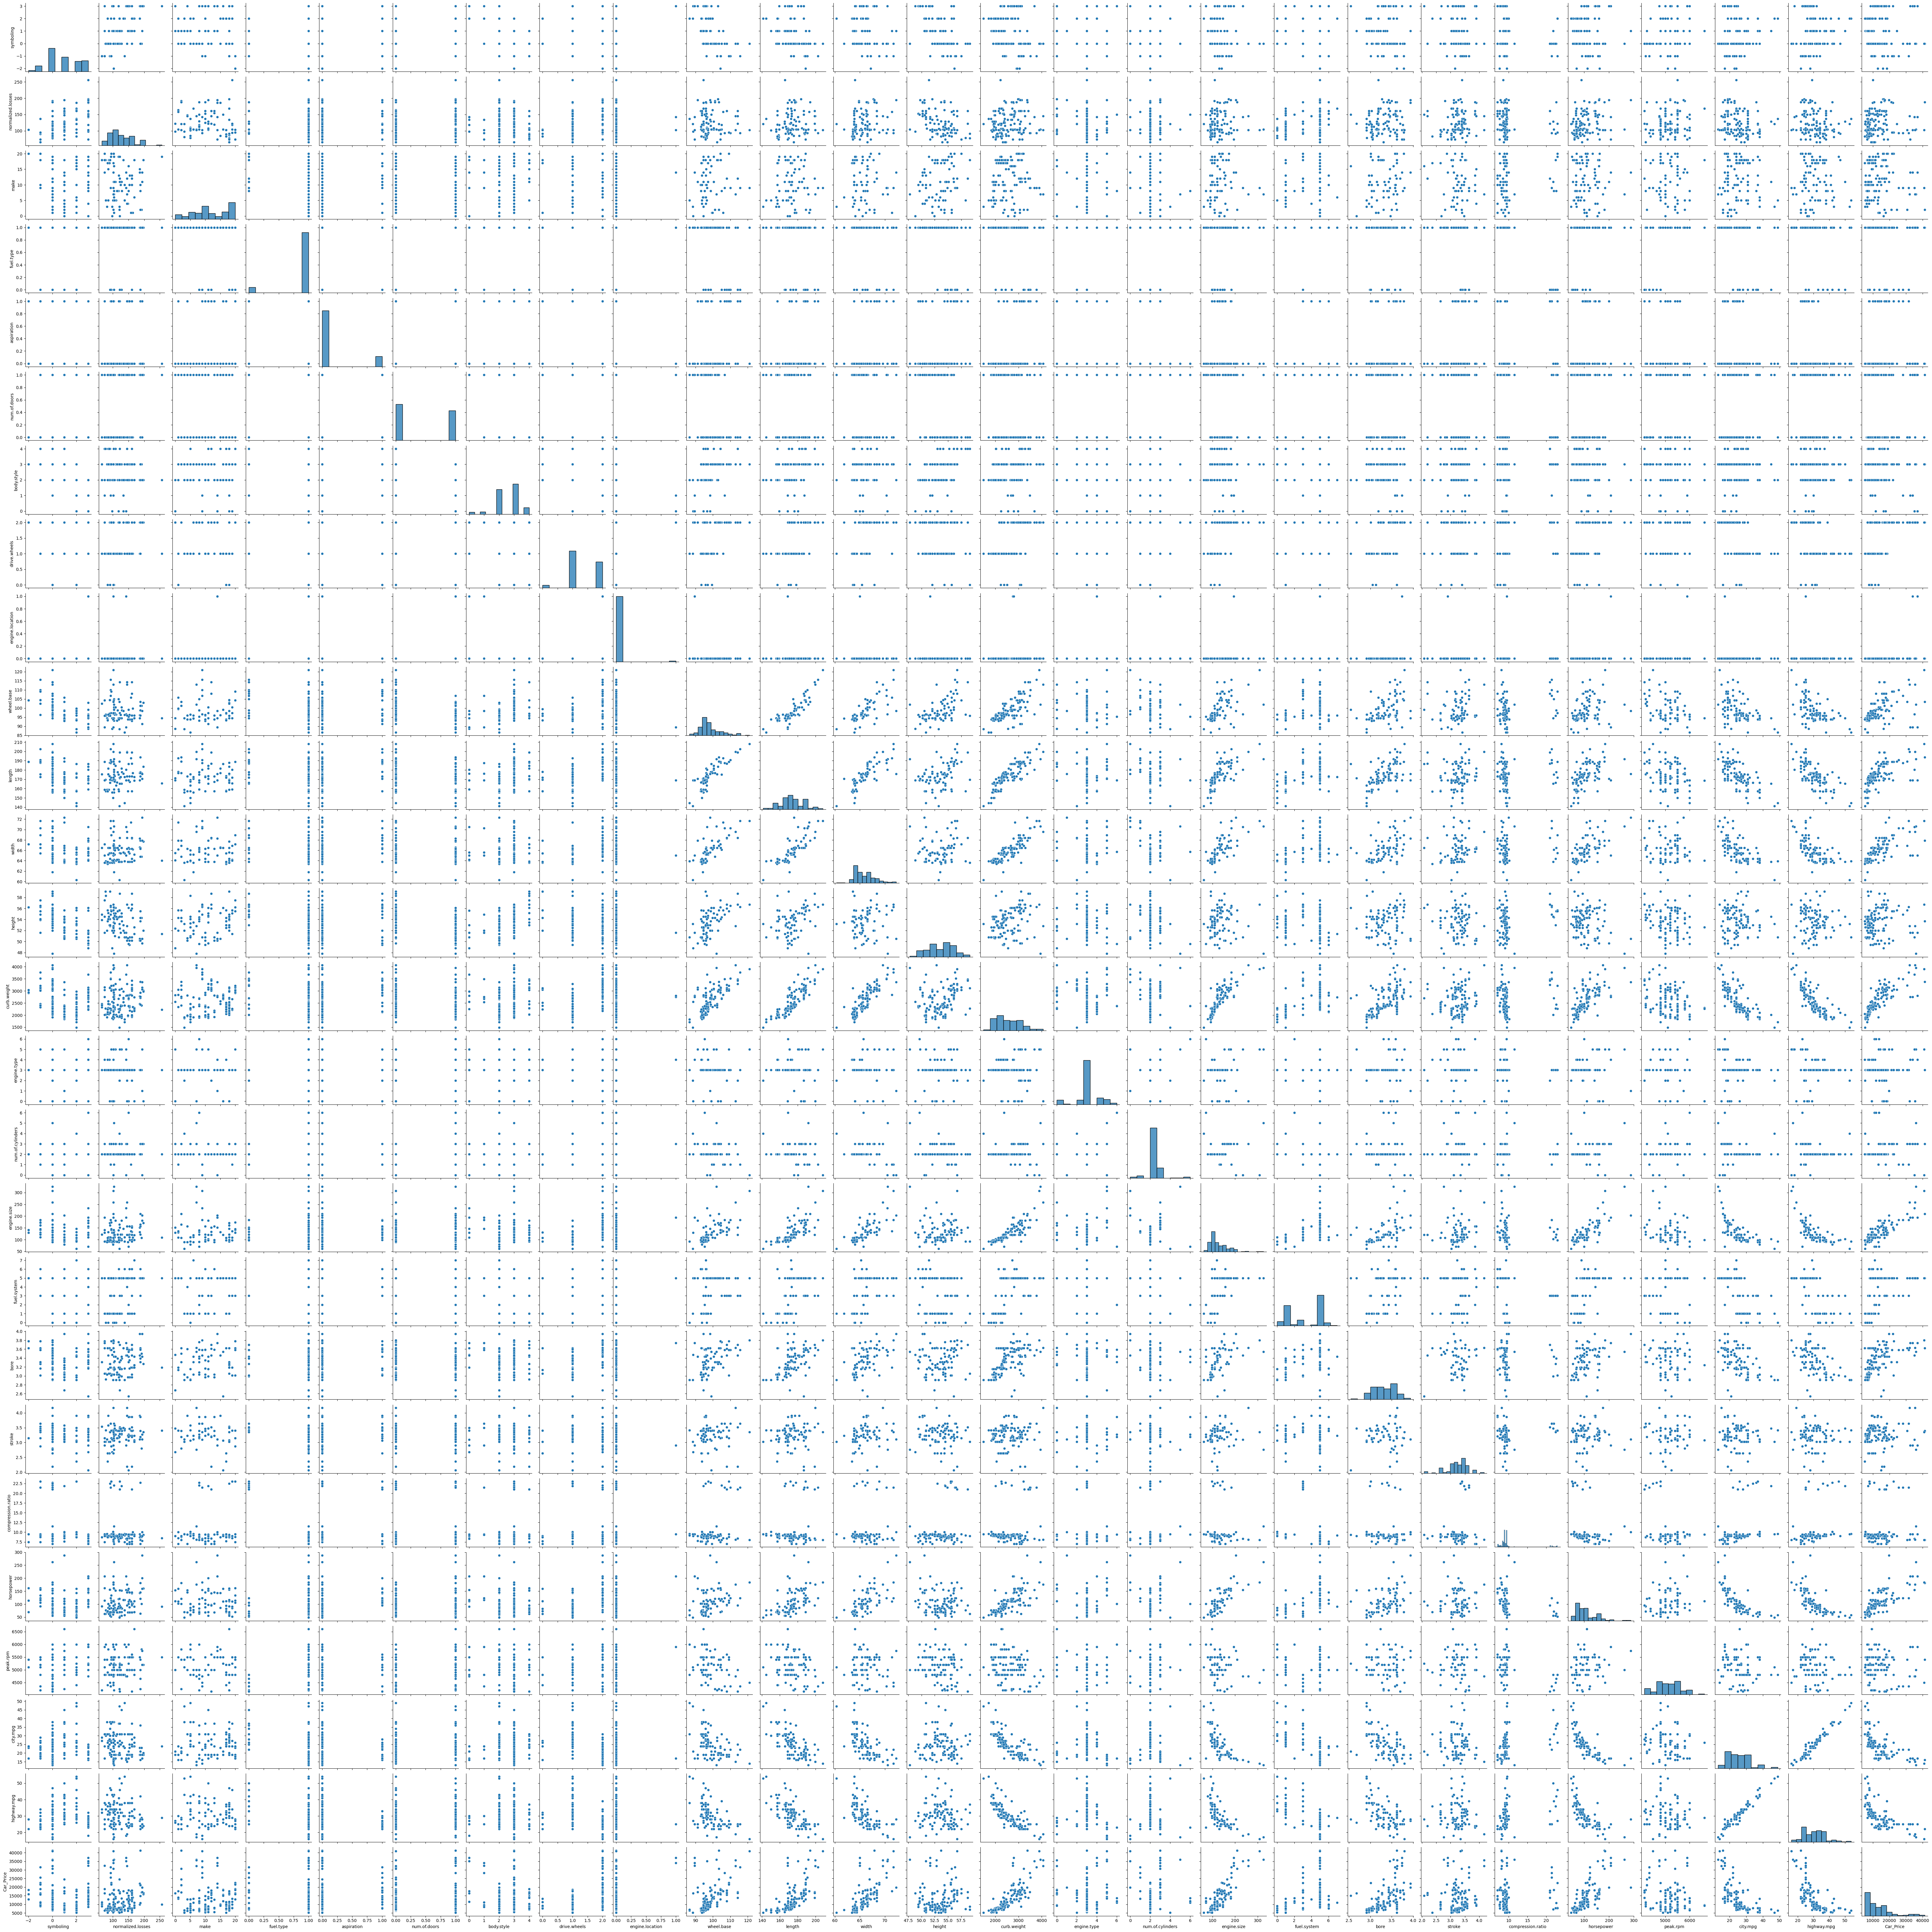

In [29]:
sns.pairplot(data)

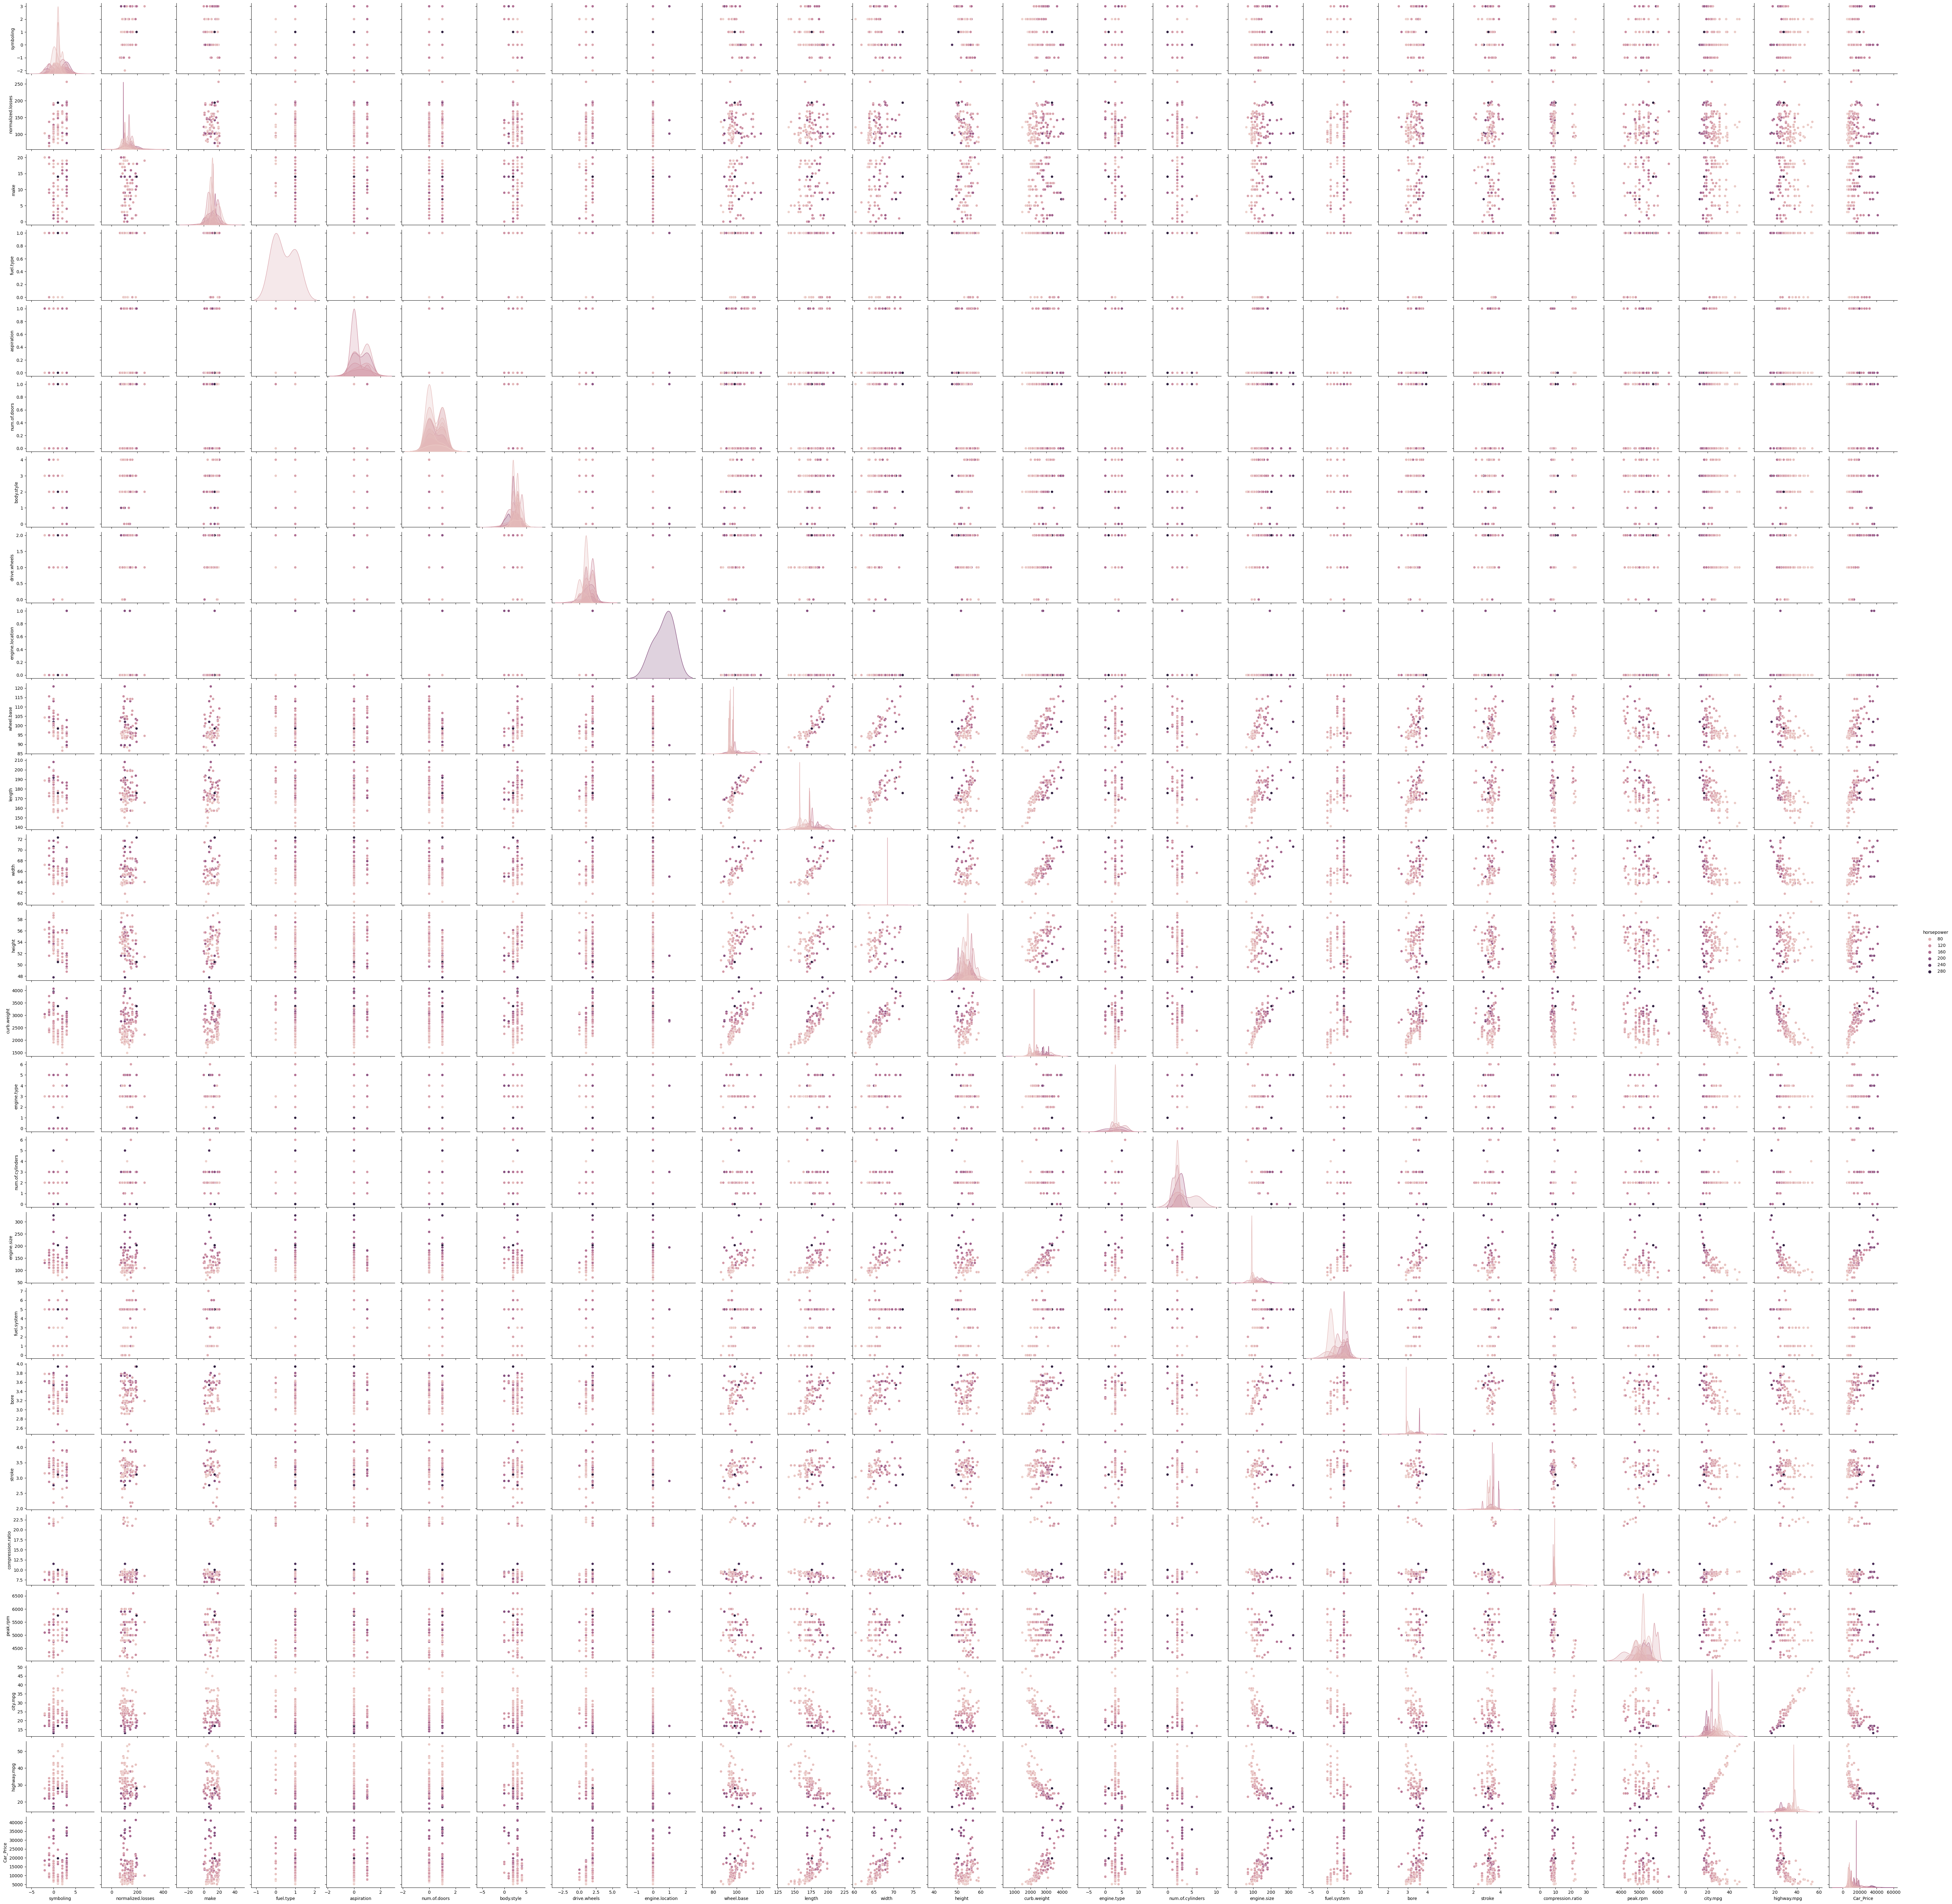

In [30]:
sns.pairplot(data,hue='horsepower')

In [31]:
data.columns

Index(['symboling', 'normalized.losses', 'make', 'fuel.type', 'aspiration',
       'num.of.doors', 'body.style', 'drive.wheels', 'engine.location',
       'wheel.base', 'length', 'width', 'height', 'curb.weight', 'engine.type',
       'num.of.cylinders', 'engine.size', 'fuel.system', 'bore', 'stroke',
       'compression.ratio', 'horsepower', 'peak.rpm', 'city.mpg',
       'highway.mpg', 'Car_Price'],
      dtype='object')

# Build Linear Regression Model

In [32]:
x=data.iloc[:,:-1]
x.head(3)

symboling  normalized.losses  make  fuel.type  aspiration  num.of.doors  \
0          1              129.0     8          1           0             1   
1          1              125.0    10          1           0             0   
2          3              150.0     8          1           0             1   

   body.style  drive.wheels  engine.location  wheel.base  ...  \
0           2             1                0        98.8  ...   
1           3             1                0        96.3  ...   
2           2             2                0        95.3  ...   

   num.of.cylinders  engine.size  fuel.system  bore  stroke  \
0                 2          122            1  3.39    3.39   
1                 2          122            1  3.35    3.46   
2                 6           70            2  3.43    3.27   

   compression.ratio  horsepower  peak.rpm  city.mpg  highway.mpg  
0                8.6        84.0    4800.0        26           32  
1                8.5        88.0    5000.0        25           32  
2                9.4       101.0    6000.0        17           23  

[3 rows x 25 columns]

In [33]:
x.shape

(162, 25)

In [34]:
y=data.iloc[:,-1:]
y.head(3)

Car_Price
0    10595.0
1     8189.0
2    13645.0

# Splitting the data

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (129, 25)

Training data-y-Shape:	 (129, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (33, 25)

Testing data(y-outcome)shape:	 (33, 1)


In [42]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#train the data
print("Training Started.......\n")
print()
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=lin_reg.predict(xtest)
print('Predicted price\n',ypred)
print('\nTesting is also completed....\n')

Training Started.......


Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training completed.....

Testing invoked......

Predicted price
 [[ 6539.81737582]
 [13942.59250918]
 [ 6982.22596137]
 [ 7894.70046206]
 [10714.63870096]
 [ 5944.20980802]
 [13616.56620553]
 [20304.7250944 ]
 [34816.92890893]
 [17847.62821836]
 [30883.02142495]
 [17848.56960333]
 [11900.66649957]
 [15992.09553   ]
 [17701.94578336]
 [10852.78449059]
 [ 5382.78107184]
 [ 7912.31552953]
 [12898.65847953]
 [10243.91200771]
 [ 8205.34319044]
 [ 9686.79835879]
 [20128.03747872]
 [10728.98216537]
 [19809.37883395]
 [ 6790.25962282]
 [15933.6714673 ]
 [ 6071.62060058]
 [19492.26256177]
 [ 8205.34319044]
 [ 7954.04201429]
 [ 6626.37689882]
 [19324.72935851]]

Testing is also completed....



In [56]:
#Evaluating the linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

Accuracy_lin_reg=r2_score(ytest,ypred)
print('Accuracy Score-Linear Regression model:\t',Accuracy_lin_reg)
print('Mean Squared Error ; \t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('Variance Score:\t',explained_variance_score(ytest,ypred))

#Coefficient of determination- R_square
print()
print('R-Square:\t',r2_score(ytest,ypred))

Accuracy Score-Linear Regression model:	 0.8139122041536031
Mean Squared Error ; 	 10125876.08442293

RMSE:	 3182.118175747552

Variance Score:	 0.8163563259614439

R-Square:	 0.8139122041536031


# Perform LASSO optimization model

In [55]:
print("*************Lasso Regression Model*************")
print()
lr=Lasso(alpha=0.01)
lr.fit(xtrain,ytrain)
print('Hyperparameter:\n',lr.get_params())
lr_pred=lr.predict(xtest)
#Performance measures
Accuracy_lasso=r2_score(ytest,lr_pred)
print('Accuracy Score-Lasso Regression model:\t',Accuracy_lasso)
print("Lasso Train_score:\t", lr.score(xtrain,ytrain))
print()
print("Lasso Test_score:\t", lr.score(xtest,ytest))
print()
print('Mean Squared Error:\t',mean_squared_error(ytest,lr_pred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,lr_pred)))
print()
print("Lasso R-Square:\t",r2_score(ytest,lr_pred))

*************Lasso Regression Model*************

Hyperparameter:
 {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Accuracy Score-Lasso Regression model:	 0.8139237783141293
Lasso Train_score:	 0.8703900384751893

Lasso Test_score:	 0.8139237783141293

Mean Squared Error:	 10125246.28215816

RMSE:	 3182.0192146117156

Lasso R-Square:	 0.8139237783141293


In [49]:
lin_reg.coef_

array([[-2.39990808e+02, -1.70131291e+01, -2.20423219e+02,
        -5.84257486e+03,  3.43027535e+01,  4.29488045e+02,
        -9.24576537e+02,  2.19024353e+03,  9.56882153e+03,
        -1.60615477e+01, -8.09863687e-01,  3.55785784e+02,
         3.12307885e+02,  3.52301349e+00, -2.52445911e+02,
         2.87674410e+02,  7.43680944e+01, -7.25393287e+00,
         1.37888911e+03, -2.63454042e+03, -2.81019009e+02,
         2.79324640e+01,  1.68851296e+00, -1.80070117e+02,
         2.41333993e+02]])

In [50]:
lr.coef_

array([-2.39893848e+02, -1.70109373e+01, -2.20446137e+02, -5.82810878e+03,
        3.50746683e+01,  4.29469222e+02, -9.24512068e+02,  2.19015078e+03,
        9.56833913e+03, -1.59987894e+01, -8.21620045e-01,  3.55576510e+02,
        3.12301802e+02,  3.52365968e+00, -2.52293269e+02,  2.87300553e+02,
        7.43619867e+01, -7.19966785e+00,  1.37880393e+03, -2.63390919e+03,
       -2.79970432e+02,  2.79338532e+01,  1.68810238e+00, -1.80110231e+02,
        2.41334706e+02])

# Perform RIDGE optimization model

In [54]:
#build bridge model
print('***********Ridge Regression model*****************')
rr=Ridge(alpha=0.01)
rr.fit(xtrain,ytrain)
print('Hyperparameter:\n',rr.get_params())
rr_pred=rr.predict(xtest)

#Performance measures

Accuracy_ridge=r2_score(ytest,rr_pred)
print('Accuracy Score-Ridge Regression model:\t',Accuracy_ridge)

print('Ridge Train score:\t',rr.score(xtrain,ytrain))
print()
print('Ridge Test score:\t',rr.score(xtest,ytest))
print()
print('Ridge R-square:\t',r2_score(ytest,rr_pred))
print()
print('Mean Squared Error:\t',mean_squared_error(ytest,rr_pred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,rr_pred)))




***********Ridge Regression model*****************
Hyperparameter:
 {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Accuracy Score-Ridge Regression model:	 0.8140540380557653
Ridge Train score:	 0.8703854866610772

Ridge Test score:	 0.8140540380557653

Ridge R-square:	 0.8140540380557653

Mean Squared Error:	 10118158.26224479

RMSE:	 3180.9052582943727


In [47]:
lin_reg.coef_

array([[-2.39990808e+02, -1.70131291e+01, -2.20423219e+02,
        -5.84257486e+03,  3.43027535e+01,  4.29488045e+02,
        -9.24576537e+02,  2.19024353e+03,  9.56882153e+03,
        -1.60615477e+01, -8.09863687e-01,  3.55785784e+02,
         3.12307885e+02,  3.52301349e+00, -2.52445911e+02,
         2.87674410e+02,  7.43680944e+01, -7.25393287e+00,
         1.37888911e+03, -2.63454042e+03, -2.81019009e+02,
         2.79324640e+01,  1.68851296e+00, -1.80070117e+02,
         2.41333993e+02]])

In [48]:
rr.coef_

array([[-2.38455255e+02, -1.69141227e+01, -2.21333194e+02,
        -5.29143414e+03,  7.03099863e+01,  4.30233893e+02,
        -9.24521334e+02,  2.18729250e+03,  9.51190832e+03,
        -1.44163294e+01, -1.27632732e+00,  3.49166319e+02,
         3.13190367e+02,  3.54062442e+00, -2.48415476e+02,
         2.76444092e+02,  7.42446691e+01, -5.60702471e+00,
         1.38554971e+03, -2.61523071e+03, -2.41005403e+02,
         2.79389343e+01,  1.67569624e+00, -1.82647917e+02,
         2.42406977e+02]])

# Ensembling(Boosting) using AdaBoostRegressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor


ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('AdaBoost Regression Model')
#train the data
print("Training Started.......\n")
print()
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_ada=ada.predict(xtest)
print('Predicted price\n',ypred_ada)
print('\nTesting is also completed....\n')


print('********AdaBoost Regression-Performance metrics*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))

print('Accuracy Score-Adaboost Regression :\t',Accuracy_ada)
print()
print('Mean Squared Error ; \t',MSE_ada)
print()
print('RMSE:\t',RMSE_ada)
print()

AdaBoost Regression Model
Training Started.......


Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training completed.....

Testing invoked......

Predicted price
 [ 5749.98345841 14564.30987083  5856.38965211  7974.02241357
 11741.57663087  6588.09460222 14133.58550897 19759.52966251
 37962.63383321 21007.49986407 37814.57598329 20020.62706921
 14784.61345041 16322.79802035 12774.10422968 15051.27232412
  5287.29069522  7923.92535502 11107.61674159 12931.36967648
  8659.63107641 10216.49968067 19460.75857746  9130.30806943
 20528.58664903  5330.78342656 15981.46838207  5842.47715658
 18618.95615562  8659.63107641  8398.14538986  5971.48736482
 18687.36048933]

Testing is also completed....

********AdaBoost Regression-Performance metrics****

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Ensembling(Boosting) using GradientBoostRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor


grad_boost=GradientBoostingRegressor(n_estimators=15)
print('GradientBoosting Regression Model')
#train the data
print("Training Started.......\n")
print()
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_grad_boost=grad_boost.predict(xtest)
print('Predicted price\n',ypred_grad_boost)
print('\nTesting is also completed....\n')


print('********GradientBoosting Regression-Performance metrics*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))

print('Accuracy Score-Gradientboosting Regression :\t',Accuracy_grad_boost)
print()
print('Mean Squared Error ; \t',MSE_grad_boost)
print()
print('RMSE:\t',RMSE_grad_boost)
print()

GradientBoosting Regression Model
Training Started.......


Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training completed.....

Testing invoked......

Predicted price
 [ 8403.99767733 14593.07264797  8528.22003791  8403.99767733
 11246.71109953  8403.99767733 15721.31859006 15643.60282767
 25924.05115984 13933.24043774 32405.77729056 15969.54334318
 12073.82739582 14344.84789485 17011.54355998 12073.82739582
  8403.99767733  8403.99767733 15163.85105725 10351.52647839
  8956.45787565 10515.66797309 15643.60282767 11424.22875498
 14922.91596777  8802.36901649 15

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Models with Accuracy scores

In [57]:
scores=[('Linear Regression',Accuracy_lin_reg),
       ('Lasso Regression',Accuracy_lasso),
       ('Ridge Regression',Accuracy_ridge),
       ('Adaboost Regressor',Accuracy_ada),
       ('Gradient Boost Regressor',Accuracy_grad_boost)]

Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
2          Ridge Regression        0.814054
1          Lasso Regression        0.813924
0         Linear Regression        0.813912
4  Gradient Boost Regressor        0.620460
3        Adaboost Regressor        0.613138


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Lasso Regression'),
  Text(2, 0, 'Ridge Regression'),
  Text(3, 0, 'Adaboost Regressor'),
  Text(4, 0, 'Gradient Boost Regressor')])

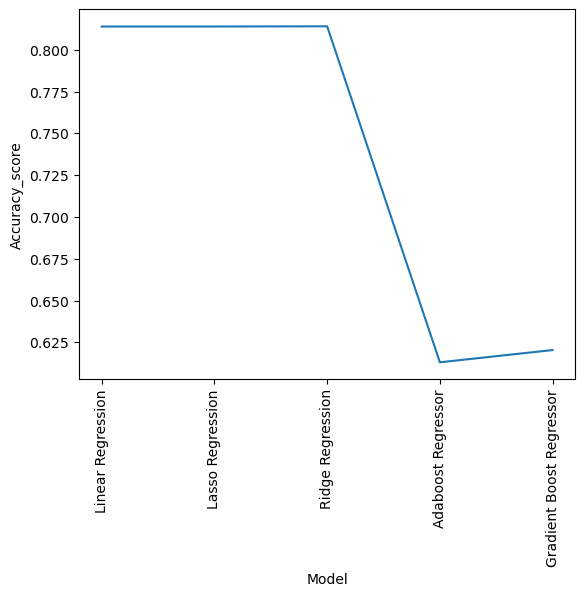

In [58]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)